<a href="https://colab.research.google.com/github/ydduri/2021_Weather_AI_BoostCamp/blob/main/%EA%B8%B0%EC%83%81%EC%B2%AD_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_1%EB%B2%88_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [ ]:
import scipy.io as sio
from scipy.io import readsav
import matplotlib.pyplot as plt

In [ ]:
!pip install tensorflow

  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30707 sha256=f38a1509285c0d6d7f611002c8c556a41fd3f56aeb2846d59166b41b4f70cdae
  Stored in directory: c:\users\yd.kim\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=4631e35888e016ee028762561442571a177909895c2739fd6ad6246cda98494b
  Stored in directory: c:\users\yd.kim\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=c0419f51ee43cb41fb674ae16f5605ebef18a8965de3f3c6934d4c4762715506
  Stored in directory: c:\users\yd.kim\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built clang termcolor wrapt
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Succes

In [ ]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
use_colab = True
assert use_colab in [True, False]
# drive 자동 마운트|

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def Readsav_ary(filename, datasetname):
    data = readsav(filename)[datasetname]
    return data

In [ ]:
xx = Readsav_ary('/content/drive/MyDrive/Colab Notebooks/기상청_3주차/dtr_i300.sav', 'i_rad')
yy = Readsav_ary('/content/drive/MyDrive/Colab Notebooks/기상청_3주차/dtr_i300.sav', 'o_rad')

In [ ]:
xx = xx.copy()
yy = yy.copy()

In [ ]:
print(xx.shape)
print(yy.shape)

(196, 271360)
(86, 271360)


# Input variables
0-38: pressure  
39-77: temperature  
78-116: water_vapor  
117-155: ozone  
156-191: cloud_fraction  
192: forcast_time  
193: surface_temperature  
194: solar_constant  
195: cosine_sloar_zenith_angle  

# Output variables
0-38: LW heating rate  
39-77: SW heating rate  
78-83: LW flux  
84-85: SW flux  


In [ ]:
pressure = xx[0:38]
temperature = xx[38:78]
water_vapor = xx[78:117]
ozone = xx[117:156]
cloud_fraction = xx[156:192]
forcast_time = xx[192]
surface_temperature = xx[193]
solar_constant = xx[194]
cosine_sloar_zenith_angle = xx[195]

# 데이터 시각화

In [ ]:
import matplotlib.pyplot as plt

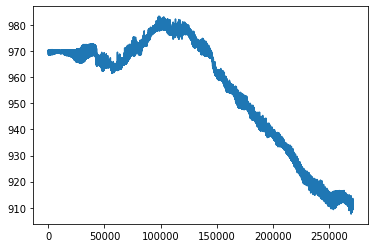

In [ ]:
plt.plot(pressure[0])
plt.show()

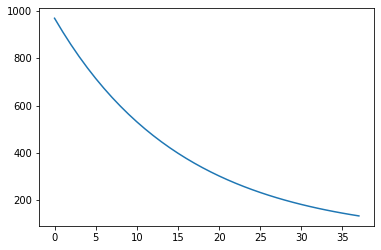

In [ ]:
plt.plot(pressure[:,0])
plt.show()

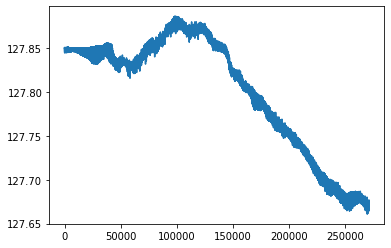

In [ ]:
plt.plot(temperature[0])
plt.show()

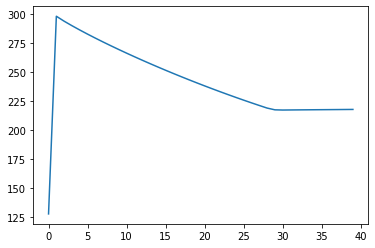

In [ ]:
plt.plot(temperature[:,0])
plt.show()

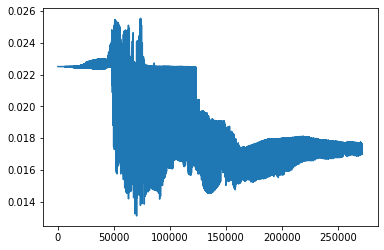

In [ ]:
plt.plot(water_vapor[0])
plt.show()

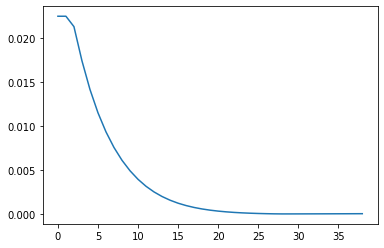

In [ ]:
plt.plot(water_vapor[:,0])
plt.show()

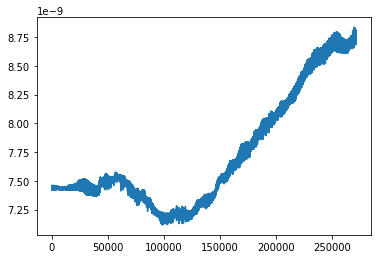

In [ ]:
plt.plot(ozone[0])
plt.show()

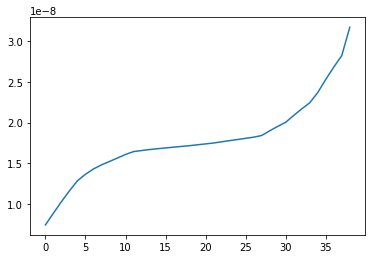

In [ ]:
plt.plot(ozone[:, 0])
plt.show()

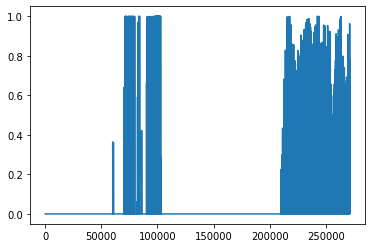

In [ ]:
plt.plot(cloud_fraction[0])
plt.show()

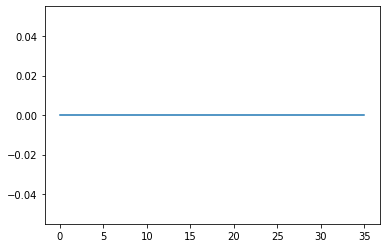

In [ ]:
plt.plot(cloud_fraction[:,1])
plt.show()

In [ ]:
len(forcast_time)

271360

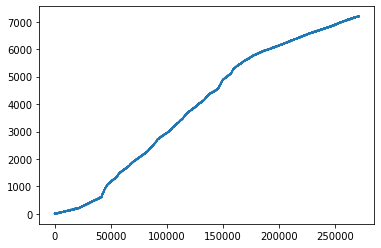

In [ ]:
plt.plot(forcast_time)
plt.show()

In [ ]:
len(set(forcast_time))

7199

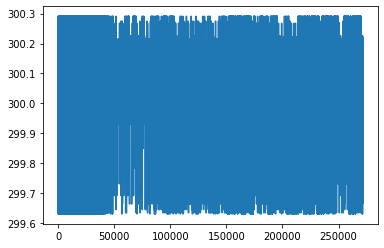

In [ ]:
plt.plot(surface_temperature)
plt.show()

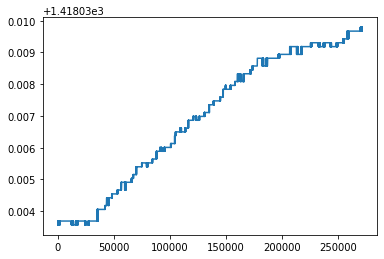

In [ ]:
plt.plot(solar_constant)
plt.show()

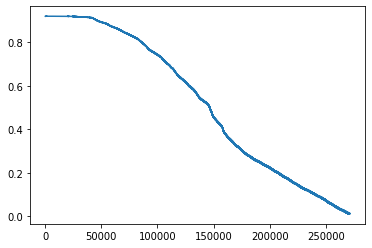

In [ ]:
plt.plot(cosine_sloar_zenith_angle)
plt.show()

# 데이터 정규화

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
xx = np.array(xx)
yy = np.array(yy)

In [ ]:
print(xx.shape)
print(yy.shape)

(196, 271360)
(86, 271360)


In [ ]:
min_max_list = [] # 정규화를 위해 각 변수의 최대 최소값을 저장함
for i in xx:
    a, b, c = np.min(i), np.max(i), np.max(i) - np.min(i) 
    min_max_list.append([a,b,c])

In [ ]:
len(min_max_list)

196

In [ ]:
len(min_max_list[0])

3

In [ ]:
def min_max_normalize(data_set, min_max_list):
    normalized_data_set = []
    
    for i in range(len(data_set)):
        normalized_data =  (data_set[i] - min_max_list[i][0])/ min_max_list[i][2]
        normalized_data_set.append(normalized_data)
    
    return normalized_data_set

In [ ]:
yy[0:78] = 86400*yy[0:78]

In [ ]:
train_d = np.array(min_max_normalize(xx, min_max_list))
label_d = yy[:]

In [ ]:
print(type(train_d))
print(type(label_d))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
train_d = train_d.transpose(1,0)
label_d = label_d.transpose(1,0)

In [ ]:
print(train_d.shape)
print(label_d.shape)

(271360, 196)
(271360, 86)


In [ ]:
###ouput을 정규화 하고 싶다면 해당 작업을 추가로 해주시면 됩니다.###
'''

mean_std_list =[]
for i in yy:
    a, b = np.mean(i), np.std(i)
    mean_std_list.append([a,b])

def z_score_normalize(data_set, mean_std_list):
    normalized_data_set = []

    for i in range(len(data_set)):
        normalized_data = (data_set[i] - mean_std_list[i][0]) / mean_std_list[i][1]
        normalized_data_set.append(normalized_data)
    return normalized_data_set

'''

'\n\nmean_std_list =[]\nfor i in yy:\n    a, b = np.mean(i), np.std(i)\n    mean_std_list.append([a,b])\n\ndef z_score_normalize(data_set, mean_std_list):\n    normalized_data_set = []\n\n    for i in range(len(data_set)):\n        normalized_data = (data_set[i] - mean_std_list[i][0]) / mean_std_list[i][1]\n        normalized_data_set.append(normalized_data)\n    return normalized_data_set\n\n'

# 데이터 분리하기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, val_data, train_label, val_label = train_test_split(train_d, label_d, test_size = 0.2)

In [ ]:
print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(val_label.shape)

(217088, 196)
(217088, 86)
(54272, 196)
(54272, 86)


In [ ]:
batch_size = 256

# for train
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_label))
train_dataset = train_dataset.shuffle(len(train_data)).repeat().batch(batch_size=batch_size)
print(train_dataset)

# for val
val_dataset = tf.data.Dataset.from_tensor_slices((val_data, val_label))
val_dataset = val_dataset.batch(batch_size=batch_size)
print(val_dataset)

<BatchDataset shapes: ((None, 196), (None, 86)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 196), (None, 86)), types: (tf.float32, tf.float32)>


# 모델 구성 1번

In [ ]:
from tensorflow.keras import layers

In [ ]:
input_tensor = layers.Input(shape=(196,))

x = layers.Dense(256)(input_tensor)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(512)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
# x = layers.Dropout(0.3)(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
# x = layers.Dropout(0.3)(x)

output_tensor = layers.Dense(86)(x)

model = tf.keras.Model(input_tensor, output_tensor)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 196)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               50432     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0     

# 모델 구성 2번

In [ ]:
from tensorflow.keras import layers

In [ ]:
input_tensor = layers.Input(shape=(196,))

x = layers.Dense(196, activation='relu')(input_tensor)
x = tf.reshape(x, [-1, 14, 14, 1])

x = layers.Conv2D(16, 3)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = x = layers.Conv2D(32, 3)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Flatten()(x)

x = layers.Dense(512)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

output_tensor = layers.Dense(86)(x)

model = tf.keras.Model(input_tensor, output_tensor)

In [ ]:
model.summary()

# 모델 구성 3번

In [ ]:
from tensorflow.keras import layers

In [ ]:
input_tensor = layers.Input(shape=(196,))

x = layers.Dense(196, activation='relu')(input_tensor)
x = tf.reshape(x, [-1, 196, 1])

x = layers.Conv1D(16, 9, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Conv1D(16, 9, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
skip_1 = layers.Activation('relu')(x)

x = layers.Conv1D(32, 9, padding='same')(skip_1)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = tf.concat([x, skip_1], -1)
x = layers.Conv1D(32, 9, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
skip_2 = layers.Activation('relu')(x)


x = layers.Conv1D(64, 9, padding='same')(skip_2)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Conv1D(64, 9, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = tf.concat([x, skip_2], -1)
x = layers.Conv1D(64, 9, strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)

x = layers.Dense(512)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

output_tensor = layers.Dense(86)(x)

model = tf.keras.Model(input_tensor, output_tensor)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 196)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 196)          38612       input_1[0][0]                    
__________________________________________________________________________________________________
tf.reshape (TFOpLambda)         (None, 196, 1)       0           dense[0][0]                      
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 196, 16)      160         tf.reshape[0][0]                 
______________________________________________________________________________________________

# 모델 학습시키기

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import os

In [ ]:
# the save point
if use_colab:
    checkpoint_dir ='./drive/My Drive/train_ckpt/weather'
    if not os.path.isdir(checkpoint_dir):
        os.makedirs(checkpoint_dir)
else:
    checkpoint_dir = 'weather'

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)

In [ ]:
cos_decay = tf.keras.experimental.CosineDecay(1e-3, 300)
lr_callback = tf.keras.callbacks.LearningRateScheduler(cos_decay, verbose=1)

es_callback = EarlyStopping(monitor= 'val_loss', patience=30)

In [ ]:
loss=tf.keras.losses.MeanSquaredError()
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
metrics=tf.keras.metrics.RootMeanSquaredError(name='RMSE')

model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

In [ ]:
max_epochs = 300

history = model.fit(train_dataset, epochs=max_epochs,
                    steps_per_epoch=len(train_data) // batch_size,
                    validation_data=val_dataset,
                    validation_steps=len(val_data) // batch_size,
                    callbacks=[cp_callback,lr_callback,es_callback]
                    )

Epoch 1/300

Epoch 00001: LearningRateScheduler setting learning rate to tf.Tensor(0.001, shape=(), dtype=float32).
848/848 [==============================] - 67s 40ms/step - loss: 5967.6758 - RMSE: 77.2507 - val_loss: 977.3599 - val_RMSE: 31.2628

Epoch 00001: val_loss improved from inf to 977.35986, saving model to ./drive/My Drive/train_ckpt/weather
Epoch 2/300

Epoch 00002: LearningRateScheduler setting learning rate to tf.Tensor(0.0009999726, shape=(), dtype=float32).
848/848 [==============================] - 34s 40ms/step - loss: 301.8084 - RMSE: 17.3726 - val_loss: 78.7641 - val_RMSE: 8.8749

Epoch 00002: val_loss improved from 977.35986 to 78.76408, saving model to ./drive/My Drive/train_ckpt/weather
Epoch 3/300

Epoch 00003: LearningRateScheduler setting learning rate to tf.Tensor(0.0009998904, shape=(), dtype=float32).
848/848 [==============================] - 34s 40ms/step - loss: 28.5769 - RMSE: 5.3457 - val_loss: 16.0427 - val_RMSE: 4.0053

Epoch 00003: val_loss improved

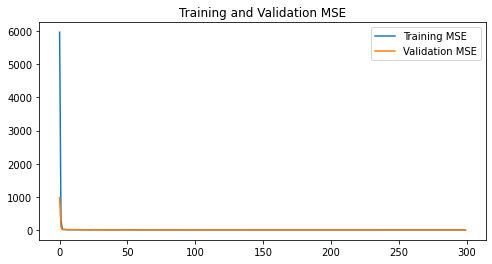

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 4))
plt.plot(epochs_range, loss, label='Training MSE')
plt.plot(epochs_range, val_loss, label='Validation MSE')
plt.legend(loc='upper right')
plt.title('Training and Validation MSE')
plt.show()

In [ ]:
results = model.evaluate(val_dataset)
print("RMSE :", results[1]) # RMSE

212/212 [==============================] - 2s 10ms/step - loss: 2.3029 - RMSE: 1.5175
RMSE : 1.517540454864502


In [ ]:
model.save('weather_model_final.h5')

# FINAL TEST

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/weather_model_final.h5')

In [ ]:
raw_test_data = Readsav_ary('/content/drive/MyDrive/Colab Notebooks/기상청_3주차/dts_i300.sav', 'i_rad')
raw_test_label = Readsav_ary('/content/drive/MyDrive/Colab Notebooks/기상청_3주차/dts_i300.sav', 'o_rad')

In [ ]:
test_data = np.array(min_max_normalize(raw_test_data, min_max_list))
test_label = raw_test_label.copy()

In [ ]:
test_label[0:78] = 86400*test_label[0:78]

In [ ]:
test_data = test_data.transpose(1,0)
test_label = test_label.transpose(1,0)

In [ ]:
print(test_data.shape)
print(test_label.shape)

(135680, 196)
(135680, 86)


In [ ]:
# for real test
batch_size =256
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_label))
test_dataset = test_dataset.batch(batch_size=batch_size)
print(test_dataset)

<BatchDataset shapes: ((None, 196), (None, 86)), types: (tf.float32, tf.float32)>


In [ ]:
results = model.evaluate(test_dataset)
print("RMSE :", results[1]) # RMSE

530/530 [==============================] - 33s 10ms/step - loss: 2.9526 - RMSE: 1.7183
RMSE : 1.7183102369308472


In [ ]:
###output을 정규화시켜줬다면 해당 작업을 추가로 해줘야합니다###
'''
def z_score_denormalize(data_set, mean_std_list):
    denormalized_data_set = []

    for i in range(len(data_set)):
        denormalized_data = data_set[i] * mean_std_list[i][1] + mean_std_list[i][0]
        denormalized_data_set.append(denormalized_data)

    return denormalized_data_set
''' 

In [ ]:
import time

start = time.time()
predictions = model.predict(test_dataset)
print("time :", time.time() - start,'s')

time : 4.198414325714111 s


In [ ]:
predictions = predictions.transpose(1,0)

In [ ]:
real_test_label = test_label[:].transpose(1,0)
real_predictions = predictions[:]

In [ ]:
print(real_test_label.shape)
print(real_predictions.shape)

(86, 135680)
(86, 135680)


In [ ]:
def total_RMSE(test_label, predictions):
    
    error_array = test_label - predictions
    RMSE = np.sqrt(np.mean(error_array**2))

    return RMSE

In [ ]:
def LW_heating_rate_RMSE(test_label, predictions):
    
    error_array = test_label[0:39] - predictions[0:39]
    RMSE = np.sqrt(np.mean(error_array**2))

    return RMSE

In [ ]:
def SW_heating_rate_RMSE(test_label, predictions):
    
    error_array = test_label[39:78] - predictions[39:78]
    RMSE = np.sqrt(np.mean(error_array**2))

    return RMSE

In [ ]:
def LW_flux(test_label, predictions):
    
    error_array = test_label[78:84] - predictions[78:84]
    RMSE = np.sqrt(np.mean(error_array**2))

    return RMSE

In [ ]:
def SW_flux(test_label, predictions):
    
    error_array = test_label[84:86] - predictions[84:86]
    RMSE = np.sqrt(np.mean(error_array**2))

    return RMSE

In [ ]:
print('total_RMSE:', total_RMSE(real_test_label, real_predictions))

total_RMSE: 1.7183113


In [ ]:
print('LW_heating_rate_RMSE:',LW_heating_rate_RMSE(real_test_label, real_predictions))

LW_heating_rate_RMSE: 1.1102979


In [ ]:
print('SW_heating_rate_RMSE:',SW_heating_rate_RMSE(real_test_label, real_predictions))

SW_heating_rate_RMSE: 0.8572811


In [ ]:
print('LW_flux:', LW_flux(real_test_label, real_predictions))

LW_flux: 1.3996686


In [ ]:
print('SW_flux:', SW_flux(real_test_label, real_predictions))

SW_flux: 9.094735


# 결과값 시각화

In [ ]:
!pip install mpl_scatter_density

     |████████████████████████████████| 655 kB 10.5 MB/s 


In [ ]:
import warnings

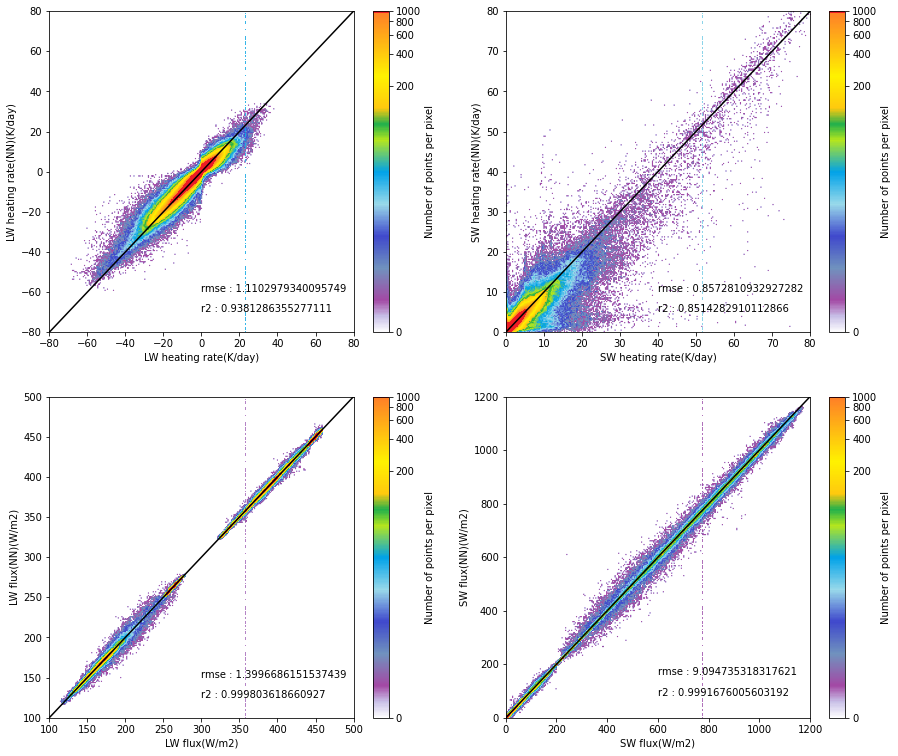

In [ ]:
warnings.filterwarnings(action='ignore')

import mpl_scatter_density
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



rainbow = LinearSegmentedColormap.from_list('rainbow', [(0, '#FFFFFF'), (0.05, '#C8BFE7'), (0.1, '#A349A4'), (0.2, '#7092BE'), (0.3, '#3F48CC'),  \
                                                        (0.4, '#99D9EA'), (0.5, '#00A2E8'), (0.6, '#B5E61D'), (0.65, '#22B14C'), (0.7, '#FFC90E'), \
                                                        (0.8, '#FFF200'), (0.999999, '#FF7F27'), (1, '#ED1C24')], N=256)

norm = ImageNormalize(vmin=0, vmax=1000, stretch=LogStretch())
fig = plt.figure(figsize=(15,13))


ax1 = fig.add_subplot(2, 2, 1, projection='scatter_density')
ax1.plot(np.linspace(-80,80,100), np.linspace(-80,80,100), color='black')
density = ax1.scatter_density(real_test_label[0:39].flatten(), real_predictions[0:39].flatten(),cmap=rainbow ,norm=norm)
ax1.set_xlim(-80, 80)
ax1.set_ylim(-80, 80)
ax1.set_xlabel('LW heating rate(K/day)')
ax1.set_ylabel('LW heating rate(NN)(K/day)')
ax1.text(0,-60,'rmse : {}'.format(mean_squared_error(real_test_label[0:39].flatten(), real_predictions[0:39].flatten())**0.5))
ax1.text(0,-70,'r2 : {}'.format(r2_score(real_test_label[0:39].flatten(), real_predictions[0:39].flatten())))
fig.colorbar(density, label='Number of points per pixel')


ax2 = fig.add_subplot(2, 2, 2, projection='scatter_density')
density = ax2.scatter_density(real_test_label[39:78].flatten(),real_predictions[39:78].flatten(),cmap=rainbow ,norm=norm)
ax2.plot(np.linspace(0,80,100), np.linspace(0,80,100), color='black')
ax2.set_xlim(0, 80)
ax2.set_ylim(0, 80)
ax2.set_xlabel('SW heating rate(K/day)')
ax2.set_ylabel('SW heating rate(NN)(K/day)')
ax2.text(40,10,'rmse : {}'.format(mean_squared_error(real_test_label[39:78].flatten(),real_predictions[39:78].flatten())**0.5))
ax2.text(40,5,'r2 : {}'.format(r2_score(real_test_label[39:78].flatten(),real_predictions[39:78].flatten())))
fig.colorbar(density, label='Number of points per pixel')


ax3 = fig.add_subplot(2, 2, 3, projection='scatter_density')
density = ax3.scatter_density(real_test_label[78:84].flatten(),real_predictions[78:84].flatten(),cmap=rainbow ,norm=norm)
ax3.plot(np.linspace(100,500,100), np.linspace(100,500,100), color='black')
ax3.set_xlim(100,500)
ax3.set_ylim(100,500)
ax3.set_xlabel('LW flux(W/m2)')
ax3.set_ylabel('LW flux(NN)(W/m2)')
ax3.text(300,150,'rmse : {}'.format(mean_squared_error(real_test_label[78:84].flatten(),real_predictions[78:84].flatten())**0.5))
ax3.text(300,125,'r2 : {}'.format(r2_score(real_test_label[78:84].flatten(),real_predictions[78:84].flatten())))
fig.colorbar(density, label='Number of points per pixel')


ax4 = fig.add_subplot(2, 2, 4, projection='scatter_density')
density = ax4.scatter_density(real_test_label[84:86].flatten(),real_predictions[84:86].flatten(),cmap=rainbow ,norm=norm)
ax4.plot(np.linspace(0, 1200,100), np.linspace(0, 1200,100), color='black')
ax4.set_xlim(0, 1200)
ax4.set_ylim(0, 1200)
ax4.set_xlabel('SW flux(W/m2)')
ax4.set_ylabel('SW flux(NN)(W/m2)')
ax4.text(600,160,'rmse : {}'.format(mean_squared_error(real_test_label[84:86].flatten(),real_predictions[84:86].flatten())**0.5))
ax4.text(600,80,'r2 : {}'.format(r2_score(real_test_label[84:86].flatten(),real_predictions[84:86].flatten())))
fig.colorbar(density, label='Number of points per pixel')